In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import functools

import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sobol_seq

import bvbq_torch

In [3]:
dim = 2
def exponential_quartic(x):
    x1,x2 = x[...,0],x[...,1]
    res = -0.1*x1**4 -0.5*(2*x2-x1**2)**2
#     return -0.5*((x1+1)**2 + (x2 - 1)**2)
    return res

In [4]:
xdata = (2*(sobol_seq.i4_sobol_generate(2,20)-0.5)) #[-1,1] cube
ydata = exponential_quartic(xdata)

In [10]:
gp = bvbq_torch.gp.SimpleGP(2,kind='smatern32',noise=0)

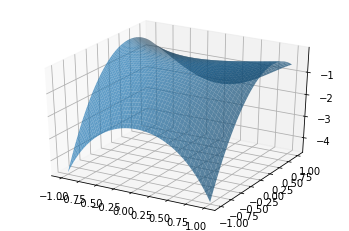

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = exponential_quartic(np.stack([X,Y],axis=-1))
ax.plot_surface(X,Y,Z,alpha=0.7)

In [ ]:
xys = (2*(sobol_seq.i4_sobol_generate(2,20)-0.5)) #[-1,1] cube
zs = exponential_quartic(xys)
ax.scatter(xys[:,0],xys[:,1],zs,color='red')
ax.set_xlabel('x');
ax.set_ylabel('y');

gp = bvbq.gp.SimpleGP(2,kind='smatern32',noise=0)
gp.set_data(xys,zs,empirical_params=True)
gp.optimize_params()
Zreg = gp.predict(np.stack([X,Y],axis=-1))[0]
ax.plot_surface(X,Y,Zreg,alpha=0.7,color='green')